<a href="https://colab.research.google.com/github/evegat/usm2025-1-dip-ia-edu-v2-evegat/blob/main/Proyecto/06validacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hito 2: Entrenamiento y comparación de modelos de clasificación

Este notebook tiene como objetivo entrenar y evaluar modelos de Machine Learning para predecir si una persona estudiará Pedagogía en base a características personales y académicas.

Utilizaremos dos algoritmos supervisados: **Árbol de Decisión** y **Bosques Aleatorios (Random Forest)** para comparar su desempeño y justificar cuál es más adecuado para el problema.


In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Cargar dataset desde GitHub
url = 'https://github.com/evegat/usm2025-1-dip-ia-edu-v2-evegat/raw/main/Proyecto/01database.csv.gz'
df = pd.read_csv(url, compression='gzip')
print(f"Dataset cargado: {df.shape[0]:,} filas, {df.shape[1]} columnas")

# Eliminar duplicados y nulos
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Codificación de región
df['region_sede'] = df['region_sede'].astype(str)
le = LabelEncoder()
df['region_sede_cod'] = le.fit_transform(df['region_sede'])

# Normalización de arancel y matrícula
columnas_numericas = ['valor_matricula', 'valor_arancel']
scaler = MinMaxScaler()
df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])

# Crear variable objetivo: si estudia pedagogía
df['es_pedagogia'] = df['nomb_carrera'].str.contains('PEDAGOG', case=False, na=False).astype(int)


Dataset cargado: 1,521,923 filas, 17 columnas


In [8]:
print("Distribución de clases (proporción de personas que estudian pedagogía):")
print(y.value_counts(normalize=True).round(3))


Distribución de clases (proporción de personas que estudian pedagogía):
es_pedagogia
0    0.915
1    0.085
Name: proportion, dtype: float64


In [9]:
# Variables predictoras
X = df[['gen_alu', 'rango_edad', 'region_sede_cod', 'tipo_inst_1', 'modalidad', 'jornada',
        'nivel_carrera_1', 'forma_ingreso', 'acreditada_carr', 'valor_matricula', 'valor_arancel']]
y = df['es_pedagogia']

# Codificación de variables categóricas
X = X.copy()
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# División entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Justificación de los modelos

- Se utiliza un **Árbol de Decisión** por su facilidad interpretativa y utilidad para datos categóricos y numéricos. Es ideal para entender qué características influyen más en la elección de carreras de pedagogía.

- Se compara con un modelo **Random Forest**, que combina múltiples árboles y mejora el desempeño general al reducir el sobreajuste. Esto es especialmente útil cuando hay clases desbalanceadas, como en este caso.


Reporte Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     59006
           1       0.76      0.75      0.76      5473

    accuracy                           0.96     64479
   macro avg       0.87      0.87      0.87     64479
weighted avg       0.96      0.96      0.96     64479

Precisión: 0.9588393120240698


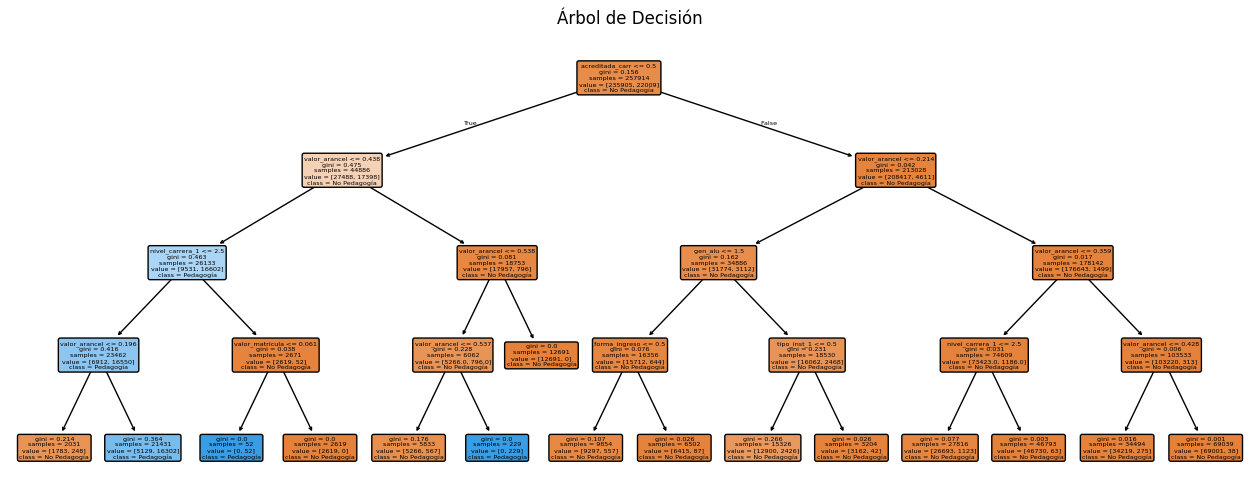

In [10]:
modelo_dt = DecisionTreeClassifier(max_depth=4, random_state=42)
modelo_dt.fit(X_train, y_train)
y_pred_dt = modelo_dt.predict(X_test)

print("Reporte Árbol de Decisión:")
print(classification_report(y_test, y_pred_dt))
print("Precisión:", accuracy_score(y_test, y_pred_dt))

# Visualización del árbol
plt.figure(figsize=(16, 6))
plot_tree(modelo_dt, feature_names=X.columns, class_names=['No Pedagogía', 'Pedagogía'],
          filled=True, rounded=True, max_depth=4)
plt.title("Árbol de Decisión")
plt.show()


In [11]:
modelo_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

print("Reporte Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Precisión:", accuracy_score(y_test, y_pred_rf))


Reporte Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     59006
           1       0.85      0.77      0.81      5473

    accuracy                           0.97     64479
   macro avg       0.92      0.88      0.90     64479
weighted avg       0.97      0.97      0.97     64479

Precisión: 0.9691992741822919


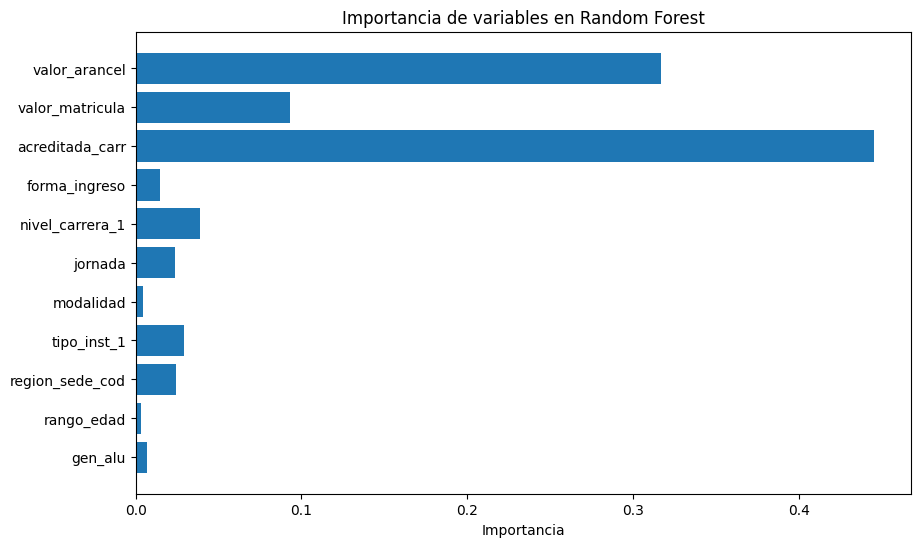

In [12]:
importances = modelo_rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Importancia")
plt.title("Importancia de variables en Random Forest")
plt.show()


## Conclusión

- El Árbol de Decisión entrega una precisión global del 95.8%, con una capacidad moderada para detectar correctamente a quienes estudian pedagogía (F1-score clase 1: 0.76).

- El modelo Random Forest mejora la precisión total (96.9%) y especialmente el desempeño sobre la clase minoritaria (F1-score clase 1: 0.81), siendo más robusto.

En base a estos resultados, se recomienda utilizar **Random Forest** como modelo principal para predecir la elección de carreras de pedagogía, debido a su mejor capacidad de generalización y balance entre precisión y recall.
